In [1]:
from __future__ import annotations

from typing import List, Tuple, Iterable
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [142]:
# need to implement this
def load_data(path: str) -> pd.DataFrame:
    """
    Read the CSV dataset "Cust_Segmentation.csv" and return a pandas DataFrame.

    TODO:
      - Use pandas to read the CSV dataset "Cust_Segmentation.csv".
      - Return the DataFrame.

    Returns
    -------
    pd.DataFrame
    """
    # TODO: implement
    df = pd.read_csv(path)
    return df
    raise NotImplementedError("Implement load_data()")

# same function implement outside this function
path = "/content/Cust_Segmentation.csv"
df = load_data(path)
df.head()



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [143]:
def preprocess(df: pd.DataFrame) -> Tuple[np.ndarray, List[str], pd.DataFrame]:
    """
    Drop categorical columns, drop rows with NaN, keep numeric columns, and standardize.

    Steps:
      1) Drop columns: "Customer Id", "Defaulted", "Address"  (ignore if missing)
      2) Keep only numeric columns
      3) Drop rows containing NaNs
      4) Standardize remaining features with StandardScaler (mean≈0, std≈1)
      5) Return (X_scaled, feature_names, df_clean)

    Returns
    -------
    X_scaled : np.ndarray        # shape (n_samples, n_features), standardized
    feature_names : List[str]    # names of the numeric features used
    df_clean : pd.DataFrame      # cleaned numeric DataFrame (pre-standardization)

    Notes
    -----
    The tests expect the banned columns to be removed and no NaNs in X.
    """
    # TODO: implement:
    #   drop_cols = ["Customer Id", "Defaulted", "Address"]
    df.drop(columns=["Customer Id", "Defaulted", "Address"], inplace=True)
    df.dropna(inplace=True)
    df_clean = df.select_dtypes(include=[np.number])
    feature_names = df_clean.columns.tolist()
    # Standardize remaining features with StandardScaler (mean≈0, std≈1)
    X_scaled = StandardScaler().fit_transform(df_clean)
    return (X_scaled,feature_names,df_clean)
    raise NotImplementedError("Implement preprocess(df)")
# print(df.shape)
# df.columns.tolist()
# #  Drop categorical columns, drop rows with NaN, keep numeric columns, and standardize.
# # df.drop(columns=["Customer Id", "Defaulted", "Address"], inplace=True)
# # df.dropna(inplace=True)
# # df.isnull().sum()

# # keeping only numeric column
# df_clean = df.select_dtypes(include=[np.number])
# df_clean.head()

# # feature_names = df_clean.columns.tolist()
# # feature_names
# X = df_clean.values
# X_scaled = StandardScaler().fit_transform(X)
# print(X_scaled)
X_scaled,feature_names,df_clean = preprocess(df)
print(X_scaled)
print(feature_names)
print(df_clean)

[[ 0.74291541  0.31212243 -0.37878978 ... -0.68381116 -0.59048916
  -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211  ...  1.41447366  1.51296181
   0.39138677]
 [-0.25251804  0.31212243  0.2117124  ...  2.13414111  0.80170393
   1.59755385]
 ...
 [-1.24795149  2.46906604 -1.26454304 ...  0.5766659   0.03863257
   3.45892281]
 [-0.37694723 -0.76634938  0.50696349 ... -0.68757659 -0.70147601
  -1.08281745]
 [ 2.1116364  -0.76634938  1.09746566 ...  0.13611081  0.16463355
  -0.2340332 ]]
['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']
     Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0     41    2               6      19      0.124       1.073              6.3
1     47    1              26     100      4.582       8.218             12.8
2     33    2              10      57      6.111       5.802             20.9
3     29    2               4      19      0.681       0.516              6.3
4     47    1              31

[5950.0, 4344.1365, 3702.5682, 3268.8345, 2883.7013, 2604.9442, 2509.5945, 2297.9308, 2156.8954, 2067.7858]


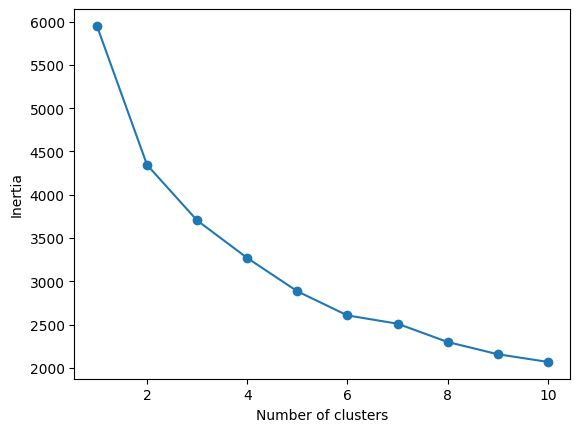

In [168]:
# task_2.py


def elbow_inertia(X: np.ndarray, k_min: int = 1, k_max: int = 10, random_state: int = 42) -> List[float]:
    """
    Fit KMeans for k in [k_min..k_max] and return the list of inertias.

    TODO:
      - Loop k from k_min to k_max (inclusive)
      - Fit KMeans(n_clusters=k, random_state=random_state)
      - Append km.inertia_ to a list
      - Return the list of inertias (length should be k_max - k_min + 1)

    """
    # TODO: implement
    intertias = []
    for k in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        # convert to float with 4 decimal point
        # intertias.append(float(f"{kmeans.inertia_:.4f}"))
        intertias.append(round(kmeans.inertia_,4))
    return intertias
    raise NotImplementedError("Implement elbow_inertia(X, k_min, k_max, random_state)")


intertias = elbow_inertia(X_scaled)
print(intertias)

# plot this in graph
import matplotlib.pyplot as plt
plt.plot(range(1,11), intertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [162]:
def identify_elbow_k() -> int:
    """
    Identify the 'elbow' k from a list of inertias.

    TODO:
      - Return the chosen k (int)

    Notes
    -----
    The tests will assert the number you return for this dataset.
    """
    return 2
    # TODO: implement heuristic and return k for this dataset
    raise NotImplementedError("Implement identify_elbow_k()")

In [163]:
def kmeans_cluster(X: np.ndarray, n_clusters: int, random_state: int = 42) -> Tuple[np.ndarray, KMeans]:
    """
    Fit KMeans and return (labels, fitted_model).

    TODO:
      - Initialize KMeans with given n_clusters/random_state
      - labels = km.fit_predict(X)
      - Return (labels, km)
    """
    # TODO: implement
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    return (labels,kmeans)
    raise NotImplementedError("Implement kmeans_cluster(X, n_clusters, random_state)")

labels,kmeans = kmeans_cluster(X_scaled, identify_elbow_k())
# print(labels)
print(np.unique(labels))


[0 1 2 3 4 5]


In [164]:
def kmeans_add_labels_and_centroids(
    df_clean: pd.DataFrame,
    labels: np.ndarray,
    feature_names: List[str],
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Add K-Means labels to df_clean and compute centroids per cluster.

    Output:
      - df_with_labels: df_clean + a new column 'cluster_kmeans'
      - centroids_df:   DataFrame of per-cluster means for the columns in feature_names
                        (rows indexed by cluster id, columns = feature_names)

    TODO:
      - Make a copy of df_clean
      - Add column 'cluster_kmeans' with the given labels
      - Group by 'cluster_kmeans' and compute mean over feature_names
      - Return (df_with_labels, centroids_df)


    """
    # TODO: implement
    df_clean_lables = df_clean.copy()
    df_clean_lables["cluster_kmeans"] = labels
    # df_clean_lables.head()

    # print(kmeans.cluster_centers_)

    centroids_df = df_clean_lables.groupby("cluster_kmeans").mean()
    # df_clean["df_with_labels"].unique()
    return (df_clean_lables,centroids_df)

    raise NotImplementedError("Implement kmeans_add_labels_and_centroids(...)")

df_clean_lables,centroids_df = kmeans_add_labels_and_centroids(df_clean, labels, feature_names)
df_clean_lables.head()
centroids_df


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
cluster_kmeans,,,,,,,
0,41.204878,1.331707,13.151220,53.565854,1.156293,2.182488,6.652683
1,33.113402,3.463918,4.546392,40.154639,0.970093,2.188351,8.338144
2,44.256757,2.216216,18.067568,111.770270,3.622892,7.994054,11.681081
3,46.250000,1.666667,23.916667,214.500000,12.131917,17.643167,18.208333
4,34.500000,1.696721,7.909836,40.967213,3.010393,5.513033,21.266393
5,29.638235,1.335294,4.573529,26.338235,0.671215,1.415909,8.223235


In [165]:
def _count_clusters(labels: np.ndarray) -> int:
    """Helper: number of clusters excluding noise (-1)."""
    uniq = set(labels.tolist())
    if -1 in uniq:
        uniq.remove(-1)
    return len(uniq)


def dbscan_cluster_to_target_k(
    X: np.ndarray,
    target_k : int=1,
) -> Tuple[np.ndarray, DBSCAN]:
    """
    Try a small grid of (eps, min_samples) values until you reach exactly target_k clusters
    (excluding noise). Return (labels, fitted_model).

    TODO:
      - Define a small grid, e.g. eps in [0.5, 0.8, 1.0, 1.2, 1.5, 2.0], min_samples in [3, 5, 8]
      - For each pair, fit DBSCAN and check number of clusters via _count_clusters
      - If exactly target_k, return (labels, model). target_k should be equal to the elbow point in Task 2.
      - If none match, return the best/last attempt
    """
    # TODO: implement
    # print("Shubham",target_k)
    eps_values = [0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0]
    min_samples_values = [2, 3, 4, 5, 6]
    l = None
    d = None
    found = False
    for e in eps_values:
        for minimum_samples in min_samples_values:
            dbscan = DBSCAN(eps=e, min_samples=minimum_samples)
            labels = dbscan.fit_predict(X_scaled)
            count = _count_clusters(labels)
            # print(count)
            if( count == target_k):
                l = labels
                d = dbscan
                found = True
                break
            else:
              # If none match, return the best/last attempt
                l = labels
                d = dbscan
        if found == True:
          break
    return (l,d)
    raise NotImplementedError("Implement dbscan_cluster_to_target_k(X, target_k)")
l,d = dbscan_cluster_to_target_k(X_scaled, target_k=identify_elbow_k())
print(np.unique(l))
print(d)


def dbscan_add_labels(df_clean: pd.DataFrame, labels: np.ndarray) -> pd.DataFrame:
    """
    Return a copy of df_clean with a new column 'cluster_dbscan' containing the labels.

    TODO:
      - Copy df_clean
      - Add column 'cluster_dbscan' with the provided labels
      - Return the new DataFrame
    """
    # TODO: implement
    df_clean_dbscan = df_clean.copy()
    df_clean_dbscan["cluster_dbscan"] = labels

    return df_clean_dbscan
    raise NotImplementedError("Implement dbscan_add_labels(df_clean, labels)")


df_clean_dbscan = dbscan_add_labels(df_clean, l)
df_clean_dbscan['cluster_dbscan'].value_counts()

[-1  0  1  2  3  4  5]
DBSCAN(eps=0.3, min_samples=4)


,count
cluster_dbscan,
-1,808
1,11
0,9
2,9
3,6
5,4
4,3


In [166]:
# task_5.py

def compute_silhouettes(
    X: np.ndarray,
    km_labels: np.ndarray,
    db_labels: np.ndarray,
) -> Tuple[float, float]:
    """
    Compute silhouette scores for K-Means and DBSCAN.

    Notes:
      - K-Means: use all samples
      - DBSCAN: ignore noise points (label == -1). Only compute if >=2 clusters remain.

    TODO:
      - km_sil = silhouette_score(X, km_labels)
      - For DBSCAN:
          mask out noise; if at least 2 clusters remain and >=2 samples, compute score on masked data
          else set db_sil = np.nan
      - Return (km_sil, db_sil) as floats
    """
    # TODO: implement
    kmeans_silhouette_score = silhouette_score(X, km_labels)
    mask_array = db_labels != -1
    X_scaled_after_mask = X[mask_array]
    # print(X_scaled_after_mask.shape)
    dbscan_lables_after_mask = db_labels[mask_array]
    # print(np.unique(dbscan_lables_after_mask))
    dbscan_silhouette_score = None
    # dbscan_silhouette_score = silhouette_score(X_scaled_after_mask, dbscan_lables_after_mask)
    if _count_clusters(dbscan_lables_after_mask) >= 2 and dbscan_lables_after_mask.size >=2:
        dbscan_silhouette_score = silhouette_score(X_scaled_after_mask, dbscan_lables_after_mask)
    else:
        dbscan_silhouette_score = np.nan
    # mask out noise; if at least 2 clusters remain and >=2 samples, compute score on masked data
              # else set db_sil = np.nan
    return (kmeans_silhouette_score,dbscan_silhouette_score)
    raise NotImplementedError("Implement compute_silhouettes(X, km_labels, db_labels)")


kmeans_silhouette_score,dbscan_silhouette_score = compute_silhouettes(X_scaled, labels, l)
print(kmeans_silhouette_score)
print(dbscan_silhouette_score)


0.23369158902743958
0.476238608569473


In [ ]:
from __future__ import annotations

from typing import List, Tuple, Iterable
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


# task_1.py



def load_data(path: str) -> pd.DataFrame:
    """
    Read the CSV dataset "Cust_Segmentation.csv" and return a pandas DataFrame.

    TODO:
      - Use pandas to read the CSV dataset "Cust_Segmentation.csv".
      - Return the DataFrame.

    Returns
    -------
    pd.DataFrame
    """
    # TODO: implement
    raise NotImplementedError("Implement load_data()")


def preprocess(df: pd.DataFrame) -> Tuple[np.ndarray, List[str], pd.DataFrame]:
    """
    Drop categorical columns, drop rows with NaN, keep numeric columns, and standardize.

    Steps:
      1) Drop columns: "Customer Id", "Defaulted", "Address"  (ignore if missing)
      2) Keep only numeric columns
      3) Drop rows containing NaNs
      4) Standardize remaining features with StandardScaler (mean≈0, std≈1)
      5) Return (X_scaled, feature_names, df_clean)

    Returns
    -------
    X_scaled : np.ndarray        # shape (n_samples, n_features), standardized
    feature_names : List[str]    # names of the numeric features used
    df_clean : pd.DataFrame      # cleaned numeric DataFrame (pre-standardization)

    Notes
    -----
    The tests expect the banned columns to be removed and no NaNs in X.
    """
    # TODO: implement:
    #   drop_cols = ["Customer Id", "Defaulted", "Address"]
    #   df_clean = ...
    #   feature_names = ...
    #   X_scaled = StandardScaler().fit_transform(...)
    raise NotImplementedError("Implement preprocess(df)")


# task_2.py


def elbow_inertia(X: np.ndarray, k_min: int = 1, k_max: int = 10, random_state: int = 42) -> List[float]:
    """
    Fit KMeans for k in [k_min..k_max] and return the list of inertias.

    TODO:
      - Loop k from k_min to k_max (inclusive)
      - Fit KMeans(n_clusters=k, random_state=random_state)
      - Append km.inertia_ to a list
      - Return the list of inertias (length should be k_max - k_min + 1)
    """
    # TODO: implement
    raise NotImplementedError("Implement elbow_inertia(X, k_min, k_max, random_state)")


def identify_elbow_k() -> int:
    """
    Identify the 'elbow' k from a list of inertias.

    TODO:
      - Return the chosen k (int)

    Notes
    -----
    The tests will assert the number you return for this dataset.
    """
    # TODO: implement heuristic and return k for this dataset
    raise NotImplementedError("Implement identify_elbow_k()")



# task_3.py



def kmeans_cluster(X: np.ndarray, n_clusters: int, random_state: int = 42) -> Tuple[np.ndarray, KMeans]:
    """
    Fit KMeans and return (labels, fitted_model).

    TODO:
      - Initialize KMeans with given n_clusters/random_state
      - labels = km.fit_predict(X)
      - Return (labels, km)
    """
    # TODO: implement
    raise NotImplementedError("Implement kmeans_cluster(X, n_clusters, random_state)")


def kmeans_add_labels_and_centroids(
    df_clean: pd.DataFrame,
    labels: np.ndarray,
    feature_names: List[str],
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Add K-Means labels to df_clean and compute centroids per cluster.

    Output:
      - df_with_labels: df_clean + a new column 'cluster_kmeans'
      - centroids_df:   DataFrame of per-cluster means for the columns in feature_names
                        (rows indexed by cluster id, columns = feature_names)

    TODO:
      - Make a copy of df_clean
      - Add column 'cluster_kmeans' with the given labels
      - Group by 'cluster_kmeans' and compute mean over feature_names
      - Return (df_with_labels, centroids_df)
    """
    # TODO: implement
    raise NotImplementedError("Implement kmeans_add_labels_and_centroids(...)")


# task_4.py



def _count_clusters(labels: np.ndarray) -> int:
    """Helper: number of clusters excluding noise (-1)."""
    uniq = set(labels.tolist())
    if -1 in uniq:
        uniq.remove(-1)
    return len(uniq)


def dbscan_cluster_to_target_k(
    X: np.ndarray,
    target_k: int = 1,
) -> Tuple[np.ndarray, DBSCAN]:
    """
    Try a small grid of (eps, min_samples) values until you reach exactly target_k clusters
    (excluding noise). Return (labels, fitted_model).

    TODO:
      - Define a small grid, e.g. eps in [0.5, 0.8, 1.0, 1.2, 1.5, 2.0], min_samples in [3, 5, 8]
      - For each pair, fit DBSCAN and check number of clusters via _count_clusters
      - If exactly target_k, return (labels, model). target_k should be equal to the elbow point in Task 2.
      - If none match, return the best/last attempt
    """
    # TODO: implement
    raise NotImplementedError("Implement dbscan_cluster_to_target_k(X, target_k)")


def dbscan_add_labels(df_clean: pd.DataFrame, labels: np.ndarray) -> pd.DataFrame:
    """
    Return a copy of df_clean with a new column 'cluster_dbscan' containing the labels.

    TODO:
      - Copy df_clean
      - Add column 'cluster_dbscan' with the provided labels
      - Return the new DataFrame
    """
    # TODO: implement
    raise NotImplementedError("Implement dbscan_add_labels(df_clean, labels)")



# task_5.py



def compute_silhouettes(
    X: np.ndarray,
    km_labels: np.ndarray,
    db_labels: np.ndarray,
) -> Tuple[float, float]:
    """
    Compute silhouette scores for K-Means and DBSCAN.

    Notes:
      - K-Means: use all samples
      - DBSCAN: ignore noise points (label == -1). Only compute if >=2 clusters remain.

    TODO:
      - km_sil = silhouette_score(X, km_labels)
      - For DBSCAN:
          mask out noise; if at least 2 clusters remain and >=2 samples, compute score on masked data
          else set db_sil = np.nan
      - Return (km_sil, db_sil) as floats
    """
    # TODO: implement
    raise NotImplementedError("Implement compute_silhouettes(X, km_labels, db_labels)")



